# Doel

Het doel van deze notebook is om de beste instellingen voor de `blackdotdetector.py` class te voorspellen aan de hand van eigenschappen van de foto.

Aanvankelijk waren dit de in- en outputs die ik in gedachten had voor het model:

**In:**
* zoom, resolutie, mean kleur foto, kleurverdeling (histogram)

**Out:**
* cell threshold, min_area, adaptive threshold, threshold/blur stippen


Om technische redenen (resolutie bestaat uit 2 cijfers) en om het model zo klein mogelijk te houden, zodat het op minder data getrained kan worden heb ik het oorspronkelijke plan naar dit veranderd:

**In:**
* schaal van foto, hoogte foto, breedte foto, mean kleur foto, contrast

**Out:**
* min_area, dot_thresh

### Dit is de data:

In [54]:
paths = ['data/Complemented/2024-08i compl OADChi E2_17.tif','data/Mutant/2024-08i mutant Mtb 2nd exp_D4_02.tif','data/Mutant/2024-08i_mutant Mtb_D5_18.tif','data/Complemented/2024-08i compl OADChi E2_02.tif','data/Mutant/2024-08i_mutant Mtb_D5_17.tif',
         'data\Mutant/2024-08i mutant Mtb 2nd exp_D4_01.tif','data/Wildtype/2024_08i_WT_D3_OADChi_05.tif','data/Wildtype/2024_08i_WT_D3_OADChi_07.tif','data/Wildtype/2024_08i_WT_D3_OADChi_20.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_01.tif',
         'data/Wildtype/2024-08i WT Mtb 2nd exp_D2_05.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_12.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_14.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_20.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_23.tif',
         'data/Complemented/2024-08i compl OADChi E2_09.tif','data/Mutant/2024-08i_mutant Mtb_D5_37.tif','data/Complemented/2024-08i compl OADChi E2_05.tif','data/Complemented/2024-08i compl OADChi E2_03.tif','data/Complemented/2024-08i compl OADChi E2_08.tif',
         'data/Complemented/2024-08i compl OADChi E2_10.tif','data/Complemented/2024-08i compl OADChi E2_12.tif','data\Complemented/2024-08i_compl_OADChi_E1_42.tif','data/Complemented\\2024-08i_compl_OADChi_E1_01.tif','data/Complemented\\2024-08i_compl_OADChi_E1_05.tif',
         'data/Complemented\\2024-08i_compl_OADChi_E1_34.tif']

In [55]:
y = [[30,40],[120,35],[100,45],[60,45],[80,45],[80,45],[100,45],[100,45],[90,45],[90,45],[50,45],
     [40,45],[100,45],[40,45],[40,45],[45,45],[90,45],[73,45],[63,45],[76,45],[82,45],[78,45]]

Het viel me tijdens het maken van de data dat de dot_thresh vrijwel geen invloed heeft, en alle foto's op `45` werken. dot_tresh ga ik daarom ook verwijderen uit de data, en als input van de class zelf. Later kwam ik erachter dat bij een lagere resolutie de blur lager moet. `dot_thresh` wordt vanaf nu vervangen met `dot_blur`.

In [56]:
y = [[30,13],[120,13],[100,13],[60,13],[80,13],[80,13],[100,13],[100,13],[90,13],[90,13],[50,13],
     [40,13],[100,13],[40,13],[40,13],[45,13],[90,13],[73,13],[63,13],[76,13],[82,13],[78,13],
     [30,7],[10,9],[10,9],[10,7]]

De output van het model is nu min_area en dot_blur

De volgende stap is de input van het model maken. Er is een lijst met alle bestanden, `paths`. Bij elk bestand in deze lijst verzameld de volgende functie `img_info()` wat informatie.

Dit is de data die deze functie over een foto geeft:
- schaal van foto
- hoogte foto
- breedte foto
- gemiddelde grijstint
- contrast (hoeveel variatie in grijstinten)

In [57]:
from bar_and_scale_finder import scale_finder
import cv2
import numpy as np

def img_info(image_path):
    image = cv2.imread(image_path)
    mean = float(image.mean())
    h,w =  image.shape[0:2]
    contrast = float(np.std(image))
    return [scale_finder(image_path), h,w, mean, contrast]

x=[]
for path in paths:
    x.append(img_info(path))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
d:\HW\gold_nanoparticle_TC\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note

EasyOCR geeft bij elke run een waarschuwing dat de tekstherkenning sneller zal zijn op GPU i.p.v. CPU. Ik heb besloten het op de CPU te houden zodat de applicatie zowiezo bij de uiteindelijke opdrachtgever ook werkt, ongeacht wat voor GPU zij hebben.

# Data verkennen

In [58]:
import pandas as pd
data = {'in':x, 'out':y}
df = pd.DataFrame.from_dict(data)
df[['scale','height','width','mean','contrast']] = pd.DataFrame(df['in'].tolist())
df[['dot_size','dot_blur']] = pd.DataFrame(df['out'].tolist())
df.pop('in')
df.pop('out')
df.head()

,scale,height,width,mean,contrast,dot_size,dot_blur
0,0.696864,3840,5120,183.776028,32.895178,30,13
1,0.502513,3840,5120,178.834893,40.377920,120,13
2,0.502513,3840,5120,192.970494,57.574980,100,13
3,0.696864,3840,5120,208.194480,36.154862,60,13
4,0.502513,3840,5120,206.937222,40.819357,80,13


In [59]:
df.mean()

scale          0.654948
height      3544.615385
width       4726.153846
mean         191.702412
contrast      41.889075
dot_size      64.884615
dot_blur      12.230769
dtype: float64

In [60]:
print(f"Unique heights:{df['height'].unique()}. Unique widths: {df['width'].unique()}")

Unique heights:[3840 1920]. Unique widths: [5120 2560]


In [61]:
df['height'].value_counts()

height
3840    22
1920     4
Name: count, dtype: int64

# Correlatie Matrix

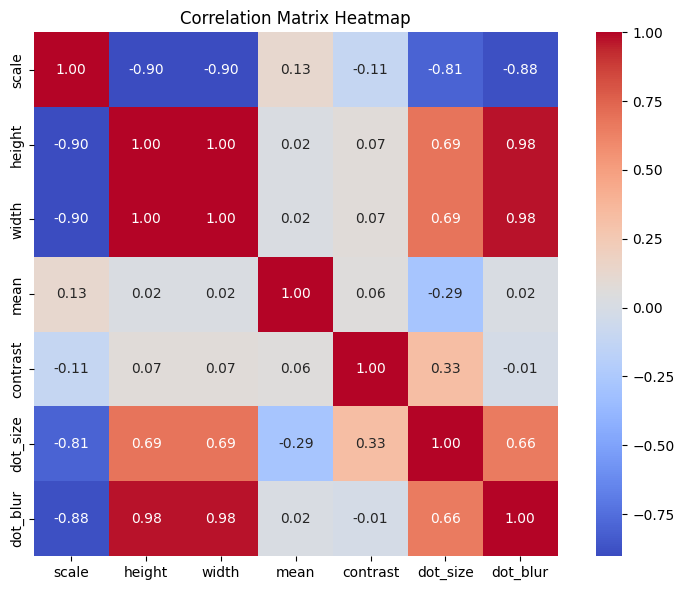

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

`dot_size` wordt het meest beinvloed door:
1. `scale`
2. `resolutie` (height en width)
3. `contrast`
4. `mean`
`dot_blur` wordt het meest beinvloed door:
1. `resolutie`
2. `scale`

Duidelijk hieruit is dat `mean` en `contrast` niet heel veel invloed hebben op de outputs, en het misschien waard zijn om te verwijderen. Ook realiseer ik me hieruit dat alle foto's dezelfde aspect ratio hebben, en `height` of `width` niet allebei hoeven (zolang er geen nieuwe foto's met een andere aspect ratio's worden toegevoegd).

# Trainen en testen

In [105]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

x = df[['scale','height']].to_numpy()
y = df[['dot_size','dot_blur']].to_numpy()


#MultiOutputRegressor is added to models that don't support multi outputs
models = {
    "RandomForest": RandomForestRegressor(n_estimators=10),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "SVR": MultiOutputRegressor(SVR()),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10)),
    "Dummy": DummyRegressor(),
    "LinearRegression": LinearRegression(),
}

#Perform Leave-One-Out on every model
for name, model in models.items():
    loo = LeaveOneOut()
    y_true, y_pred = [], []

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        y_true.append(y_test[0])
        y_pred.append(prediction[0])

    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} LOOCV Mean Squared Error: {mse:.4f}")

RandomForest LOOCV Mean Squared Error: 139.8865
KNN LOOCV Mean Squared Error: 207.9637
SVR LOOCV Mean Squared Error: 544.3186
GradientBoosting LOOCV Mean Squared Error: 181.1193
Dummy LOOCV Mean Squared Error: 520.7336
LinearRegression LOOCV Mean Squared Error: 230.8101


RandomForest presteert het beste (MSE 126 tot 143)

Nu verwijder ik de `width`, `mean` en `contrast` en train en test ik opnieuw.

In [106]:
df_light = df.drop('width', axis='columns')
df_light = df.drop('mean', axis='columns')
df_light = df.drop('contrast', axis='columns')

In [107]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

x = df_light[['scale','height']].to_numpy()
y = df_light[['dot_size','dot_blur']].to_numpy()

#MultiOutputRegressor is added to models that don't support multi outputs
models = {
    "RandomForest": RandomForestRegressor(n_estimators=10),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "SVR": MultiOutputRegressor(SVR()),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10)),
    "Dummy": DummyRegressor(),
    "LinearRegression": LinearRegression(),
}

#Perform Leave-One-Out on every model
for name, model in models.items():
    loo = LeaveOneOut()
    y_true, y_pred = [], []

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        y_true.append(y_test[0])
        y_pred.append(prediction[0])

    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} LOOCV Mean Squared Error: {mse:.4f}")

RandomForest LOOCV Mean Squared Error: 137.2494
KNN LOOCV Mean Squared Error: 207.9637
SVR LOOCV Mean Squared Error: 544.3186
GradientBoosting LOOCV Mean Squared Error: 181.1193
Dummy LOOCV Mean Squared Error: 520.7336
LinearRegression LOOCV Mean Squared Error: 230.8101


RandomForest presteert hier ook het beste (MSE 131 tot 146)

Het lijkt beter om `mean` en `contrast` toch te houden. De score is niet veel slechter zonder, maar zowiezo niet beter.

# Voorbeeld

In [88]:
final_model = LinearRegression()
x = df[['scale','height']].to_numpy()
y = df[['dot_size','dot_blur']].to_numpy()
final_model.fit(x, y)

LinearRegression()

In [ ]:
file = 'data/Complemented\\2024-08i compl OADChi E2_03.tif'
input = [img_info(file)] #Moet 2d om wat voor reden
input = [input[0][0:-3]]

print(input)
min_area, dot_blur = final_model.predict(input)[0]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[0.5025125628140703, 3840]]


d:\HW\gold_nanoparticle_TC\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


De data moet afgerond worden, en dot_blur moet oneven zijn.

In [ ]:
def round_to_nearest_odd(n):
    """
    Gemaakt door chatGPT als voorbeeld, geen idee hoe het werkt
    """
    n_rounded = round(n)
    if n_rounded % 2 == 0:
        # If even, decide whether to go up or down to the nearest odd
        lower = n_rounded - 1
        upper = n_rounded + 1
        return lower if abs(n - lower) <= abs(n - upper) else upper
    else:
        return n_rounded

min_area = round(min_area)
dot_blur = round_to_nearest_odd(dot_blur)
print(min_area,dot_blur)

80 13


Detecting cell...
Cell surface area is: 3723158.0
Cell detected.

Finding black dots...


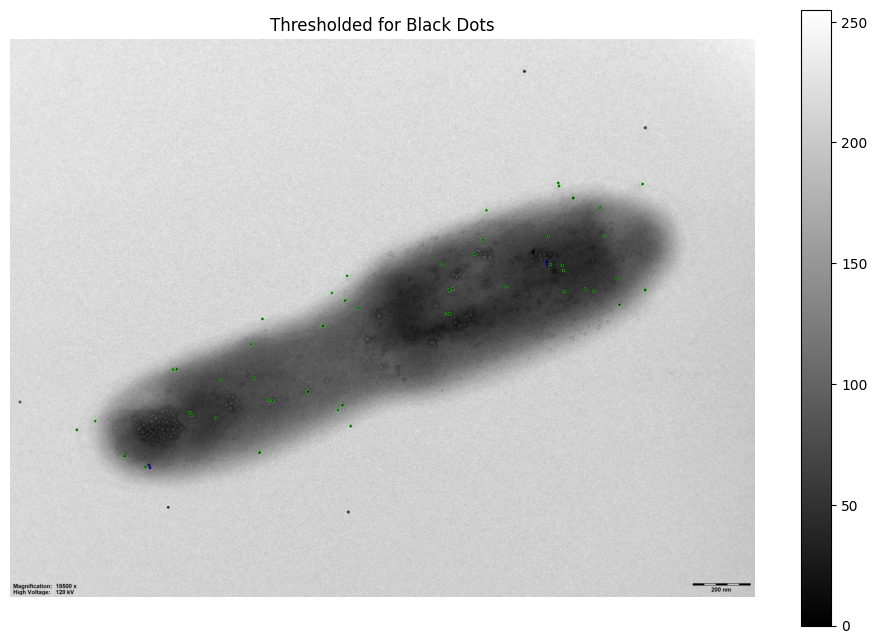

Total black dots found: 54
Size of the smallest dot after discarding 50%: 241.5 pixels²
All dot areas: [174.5, 199.5, 200.5, 210.0, 211.5, 213.0, 213.0, 215.5, 216.0, 216.0, 216.0, 216.5, 221.5, 222.0, 222.0, 225.0, 227.5, 229.0, 229.5, 229.5, 230.0, 230.5, 230.5, 231.0, 239.5, 241.5, 243.0, 243.5, 244.5, 244.5, 246.0, 248.0, 248.5, 251.5, 252.0, 253.5, 253.5, 254.5, 255.0, 256.5, 259.0, 268.5, 278.0, 278.0, 280.0, 281.0, 283.5, 290.0, 296.0, 343.0]


In [103]:
from blackdotdetector import BlackDotDetector
count_dots = BlackDotDetector(file, min_area=min_area, prevent_false_positives=True, dot_blur=dot_blur)
count_dots.run()

Foto ziet er goed uit. Ookal is het model niet heel precies met min_area, deze variabele hoeft ook niet heel precies te zijn. Zolang min_area niet teveel onder het stipoppervlak zit werkt het. (Hoe dichter bij, hoe sneller en minder fouten er worden gemaakt)